# An overview on KPIs

This notebook provides an overview on the KPIs of all data sets and how they relate to each other.

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
brands = ["Adidas", "Converse", "New Balance", "Nike","Reebok"]
sentiments = ["negative", "neutral", "positive"]

## The data sets

The data sets retrieved from each source should look similar to the stubs presented below.

Share of voice data source: [Link](https://github.com/HuanSunGo/Quantilope_Core/blob/main/src/tweet_analysis/twitter_frances/share_of_voice_franyang_nov10.ipynb) <br>
Activities per tweet data source: [Link](https://github.com/HuanSunGo/Quantilope_Core/blob/main/src/tweet_analysis/twitter_frances/activities_per_tweet_franyang_nov10.ipynb)

### Twitter:

In [5]:
# Add also the other KPIs for activities per tweet and share of voice as columns to the data set.
twitter_stub = pd.DataFrame(index=brands, columns=[f"perc_{sentiment}" for sentiment in sentiments])

"""Twitter Dataset"""
# adidas, converse, new balance, nike, reebok
# please fill in the sentiment percent below 
twitter_stub["perc_negative"] = [0.13, 0.19, 0.09, 0.14, 0.07]
twitter_stub["perc_neutral"] = [0.67, 0.59, 0.63, 0.65, 0.79]
twitter_stub["perc_positive"] = [0.20, 0.22, 0.28, 0.21, 0.14]

# adidas, converse, new balance, nike, reebok
# share of voice
twitter_stub['share_of_voice'] = [0.19, 0.08, 0.05, 0.66, 0.02]
# adidas, converse, new balance, nike, reebok
# activities per tweet 
twitter_stub['retweets_mean'] = [0.67, 0.46, 0.59, 0.53, 0.32]
twitter_stub['replies_mean'] = [0.83, 0.73, 0.65, 0.65, 0.48]
twitter_stub['likes_mean'] = [6.5, 6.72, 6.11, 6.95, 5.68]
twitter_stub['quote_count_mean'] = [0.16, 0.10, 0.08, 0.11, 0.064]

twitter_stub



,perc_negative,perc_neutral,perc_positive,share_of_voice,retweets_mean,replies_mean,likes_mean,quote_count_mean
Adidas,0.13,0.67,0.20,0.19,0.67,0.83,6.50,0.160
Converse,0.19,0.59,0.22,0.08,0.46,0.73,6.72,0.100
New Balance,0.09,0.63,0.28,0.05,0.59,0.65,6.11,0.080
Nike,0.14,0.65,0.21,0.66,0.53,0.65,6.95,0.110
Reebok,0.07,0.79,0.14,0.02,0.32,0.48,5.68,0.064


## Total Survey Sample

#### Adding more KPI to survey

In [7]:
# load the additional KPIs 
df_kpi_tot = pd.read_csv("total_brand_KPI.csv")

df_kpi_tot = df_kpi_tot.rename(columns={'Unnamed: 0': 'brands'})
df_kpi_tot

,brands,brand_aware,brand_consideration,brand_purchase,brand_preference
0,Adidas,0.92,0.60,0.56,0.56
1,Converse,0.77,0.35,0.36,0.36
2,New Balance,0.79,0.49,0.44,0.44
3,Nike,0.94,0.68,0.71,0.71
4,Reebok,0.81,0.81,0.35,0.35


In [8]:
# roberta sentiment scores on total survey

survey_tot_stub = pd.DataFrame(columns=[f"perc_{sentiment}" for sentiment in sentiments])

survey_tot_stub["perc_positive"] = [0.56, 0.45, 0.56, 0.56, 0.46]
survey_tot_stub["perc_neutral"] = [0.33, 0.42, 0.34, 0.27, 0.36]
survey_tot_stub["perc_negative"] = [0.11, 0.13, 0.10, 0.16, 0.18]
survey_tot_stub['brands'] = brands
survey_tot_stub

,perc_negative,perc_neutral,perc_positive,brands
0,0.11,0.33,0.56,Adidas
1,0.13,0.42,0.45,Converse
2,0.10,0.34,0.56,New Balance
3,0.16,0.27,0.56,Nike
4,0.18,0.36,0.46,Reebok


In [9]:
# final total survey dataframe for correlation computation 
survey_tot = pd.merge(survey_tot_stub,df_kpi_tot, on='brands')
survey_tot = survey_tot.set_index('brands')
survey_tot 

,perc_negative,perc_neutral,perc_positive,brand_aware,brand_consideration,brand_purchase,brand_preference
brands,,,,,,,
Adidas,0.11,0.33,0.56,0.92,0.60,0.56,0.56
Converse,0.13,0.42,0.45,0.77,0.35,0.36,0.36
New Balance,0.10,0.34,0.56,0.79,0.49,0.44,0.44
Nike,0.16,0.27,0.56,0.94,0.68,0.71,0.71
Reebok,0.18,0.36,0.46,0.81,0.81,0.35,0.35


## Survey Sub-sample

In [10]:

'''
This part is for the subsample dataset. (Twitter users)
'''

survey_twitter_savy_stub = pd.DataFrame(index=brands, columns=[f"perc_{sentiment}" for sentiment in sentiments])

survey_twitter_savy_stub["perc_positive"] = [0.65, 0.53, 0.63, 0.69, 0.57]
survey_twitter_savy_stub["perc_neutral"] = [0.28, 0.36,  0.26,0.23, 0.30]
survey_twitter_savy_stub["perc_negative"] = [0.07, 0.10, 0.10, 0.08, 0.12]
survey_twitter_savy_stub['brands'] =brands
survey_twitter_savy_stub

,perc_negative,perc_neutral,perc_positive,brands
Adidas,0.07,0.28,0.65,Adidas
Converse,0.10,0.36,0.53,Converse
New Balance,0.10,0.26,0.63,New Balance
Nike,0.08,0.23,0.69,Nike
Reebok,0.12,0.30,0.57,Reebok


In [11]:
# load additional KPIs for the subsample
subsample_kpi = pd.read_csv("subsample_brand_KPI_nov17.csv")
subsample_kpi = subsample_kpi.rename(columns={'Unnamed: 0': 'brands'})
subsample_kpi

,brands,brand_aware,brand_consideration,brand_purchase,brand_preference
0,Adidas,0.92,0.68,0.65,0.33
1,Converse,0.69,0.41,0.36,0.33
2,New Balance,0.72,0.46,0.40,0.23
3,Nike,0.93,0.76,0.76,0.42
4,Reebok,0.75,0.39,0.36,0.14


In [12]:
# final subsample survey dataframe for correlation computation 
survey_subsample = pd.merge(survey_twitter_savy_stub,subsample_kpi, on='brands')
survey_subsample = survey_subsample.set_index('brands')
survey_subsample

,perc_negative,perc_neutral,perc_positive,brand_aware,brand_consideration,brand_purchase,brand_preference
brands,,,,,,,
Adidas,0.07,0.28,0.65,0.92,0.68,0.65,0.33
Converse,0.10,0.36,0.53,0.69,0.41,0.36,0.33
New Balance,0.10,0.26,0.63,0.72,0.46,0.40,0.23
Nike,0.08,0.23,0.69,0.93,0.76,0.76,0.42
Reebok,0.12,0.30,0.57,0.75,0.39,0.36,0.14


# Within-data correlation

Here, we want to see how KPIs within a data set are correlated with each other. For that, we first rank the data. Let us take the twitter data as an example.

## Twitter

In [13]:
twitter_ranked = twitter_stub.rank(axis="index", ascending=False)
twitter_ranked

,perc_negative,perc_neutral,perc_positive,share_of_voice,retweets_mean,replies_mean,likes_mean,quote_count_mean
Adidas,3.0,2.0,4.0,2.0,1.0,1.0,3.0,1.0
Converse,1.0,5.0,2.0,3.0,4.0,2.0,2.0,3.0
New Balance,4.0,4.0,1.0,4.0,2.0,3.5,4.0,4.0
Nike,2.0,3.0,3.0,1.0,3.0,3.5,1.0,2.0
Reebok,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0


## Survey (sub-sample)

In [14]:
survey_sub_ranked = survey_subsample.rank(axis="index", ascending=False)
df1 = survey_sub_ranked
survey_sub_ranked


,perc_negative,perc_neutral,perc_positive,brand_aware,brand_consideration,brand_purchase,brand_preference
brands,,,,,,,
Adidas,5.0,3.0,2.0,2.0,2.0,2.0,2.5
Converse,2.5,1.0,5.0,5.0,4.0,4.5,2.5
New Balance,2.5,4.0,3.0,4.0,3.0,3.0,4.0
Nike,4.0,5.0,1.0,1.0,1.0,1.0,1.0
Reebok,1.0,2.0,4.0,3.0,5.0,4.5,5.0


## Survey (total)

In [15]:
survey_tot_ranked = survey_tot.rank(axis="index", ascending=False)
df2 = survey_tot_ranked
survey_tot_ranked


,perc_negative,perc_neutral,perc_positive,brand_aware,brand_consideration,brand_purchase,brand_preference
brands,,,,,,,
Adidas,4.0,4.0,2.0,2.0,3.0,2.0,2.0
Converse,3.0,1.0,5.0,5.0,5.0,4.0,4.0
New Balance,5.0,3.0,2.0,4.0,4.0,3.0,3.0
Nike,2.0,5.0,2.0,1.0,2.0,1.0,1.0
Reebok,1.0,2.0,4.0,3.0,1.0,5.0,5.0


Now, that all the KPIs are ranked, let's calculate Kendall's tau for each combination of KPIs.

## Kendall's Tau Calculation

In [17]:
# Twitter 

cross_correlations_twitter = twitter_ranked.corr(method="kendall").round(2)
cross_correlations_twitter

,perc_negative,perc_neutral,perc_positive,share_of_voice,retweets_mean,replies_mean,likes_mean,quote_count_mean
perc_negative,1.00,-0.60,0.40,0.60,0.00,0.53,0.80,0.40
perc_neutral,-0.60,1.00,-0.80,-0.20,0.00,-0.32,-0.40,0.00
perc_positive,0.40,-0.80,1.00,0.00,0.20,0.11,0.20,-0.20
share_of_voice,0.60,-0.20,0.00,1.00,0.40,0.53,0.80,0.80
retweets_mean,0.00,0.00,0.20,0.40,1.00,0.53,0.20,0.60
replies_mean,0.53,-0.32,0.11,0.53,0.53,1.00,0.32,0.74
likes_mean,0.80,-0.40,0.20,0.80,0.20,0.32,1.00,0.60
quote_count_mean,0.40,0.00,-0.20,0.80,0.60,0.74,0.60,1.00


In [18]:
# Survey Sub-sample
cross_correlations_survey_sub1 = survey_sub_ranked.corr(method = "kendall").round(2)
cross_correlations_survey_sub1

,perc_negative,perc_neutral,perc_positive,brand_aware,brand_consideration,brand_purchase,brand_preference
perc_negative,1.00,0.32,-0.53,-0.32,-0.74,-0.67,-0.67
perc_neutral,0.32,1.00,-0.80,-0.60,-0.60,-0.74,-0.32
perc_positive,-0.53,-0.80,1.00,0.80,0.80,0.95,0.53
brand_aware,-0.32,-0.60,0.80,1.00,0.60,0.74,0.32
brand_consideration,-0.74,-0.60,0.80,0.60,1.00,0.95,0.74
brand_purchase,-0.67,-0.74,0.95,0.74,0.95,1.00,0.67
brand_preference,-0.67,-0.32,0.53,0.32,0.74,0.67,1.00


In [19]:
# Survey Total
cross_correlations_survey_tot1 = survey_tot_ranked.corr(method="kendall").round(2)
cross_correlations_survey_tot1


,perc_negative,perc_neutral,perc_positive,brand_aware,brand_consideration,brand_purchase,brand_preference
perc_negative,1.00,0.00,-0.36,0.2,0.60,-0.2,-0.2
perc_neutral,0.00,1.00,-0.84,-0.8,-0.40,-0.8,-0.8
perc_positive,-0.36,-0.84,1.00,0.6,0.12,0.6,0.6
brand_aware,0.20,-0.80,0.60,1.0,0.60,0.6,0.6
brand_consideration,0.60,-0.40,0.12,0.6,1.00,0.2,0.2
brand_purchase,-0.20,-0.80,0.60,0.6,0.20,1.0,1.0
brand_preference,-0.20,-0.80,0.60,0.6,0.20,1.0,1.0


<AxesSubplot: >

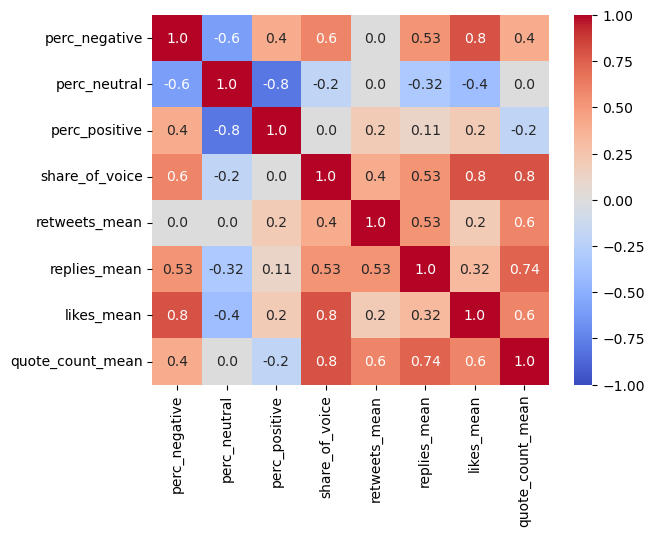

In [20]:
sns.heatmap(data=cross_correlations_twitter, cmap="coolwarm", annot=True, 
            fmt='.2', vmin=-1, vmax=1)

<AxesSubplot: >

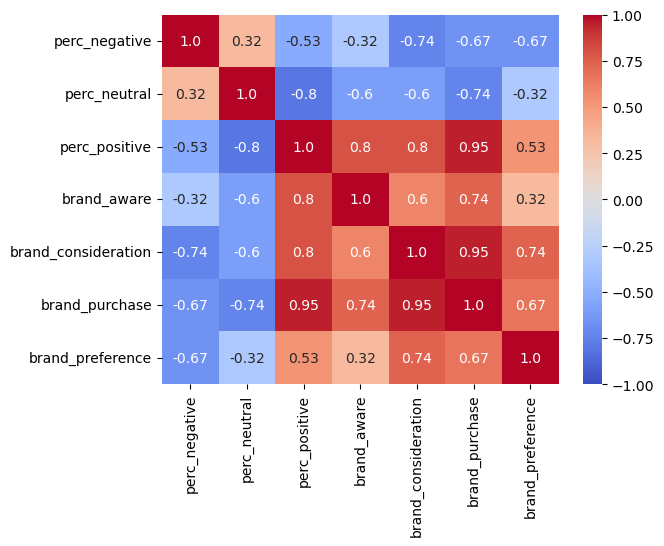

In [69]:
sns.heatmap(data=cross_correlations_survey_sub1, cmap="coolwarm", annot=True, 
            fmt='.2', vmin=-1, vmax=1)

<AxesSubplot: >

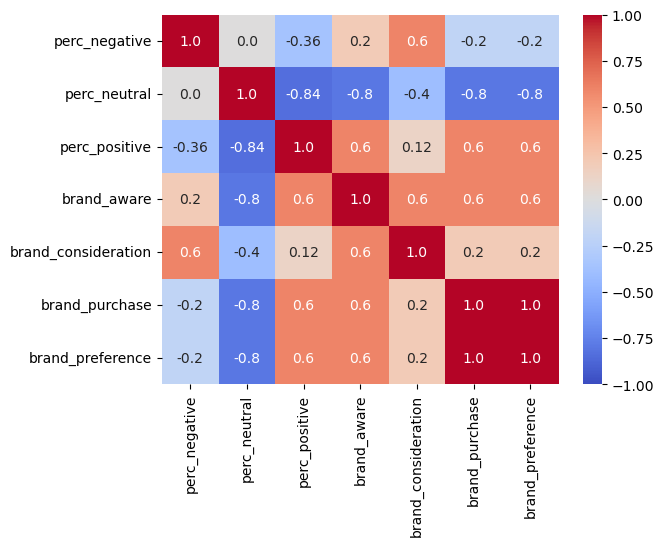

In [21]:
sns.heatmap(data=cross_correlations_survey_tot1, cmap="coolwarm", annot=True, 
            fmt='.2', vmin=-1, vmax=1)

## Pearson Correlation

In [22]:
# Twitter
cross_correlations_twitter_pearson = twitter_ranked.corr(method="pearson").round(2)
cross_correlations_twitter_pearson

,perc_negative,perc_neutral,perc_positive,share_of_voice,retweets_mean,replies_mean,likes_mean,quote_count_mean
perc_negative,1.00,-0.70,0.40,0.70,0.10,0.62,0.90,0.60
perc_neutral,-0.70,1.00,-0.90,-0.20,-0.10,-0.36,-0.50,-0.10
perc_positive,0.40,-0.90,1.00,0.10,0.30,0.21,0.30,0.00
share_of_voice,0.70,-0.20,0.10,1.00,0.50,0.56,0.90,0.90
retweets_mean,0.10,-0.10,0.30,0.50,1.00,0.67,0.20,0.70
replies_mean,0.62,-0.36,0.21,0.56,0.67,1.00,0.46,0.82
likes_mean,0.90,-0.50,0.30,0.90,0.20,0.46,1.00,0.70
quote_count_mean,0.60,-0.10,0.00,0.90,0.70,0.82,0.70,1.00


In [23]:
# Survey Total

cross_correlations_survey_tot2 = survey_tot_ranked.corr(method="pearson").round(2)
cross_correlations_survey_tot2

,perc_negative,perc_neutral,perc_positive,brand_aware,brand_consideration,brand_purchase,brand_preference
perc_negative,1.00,0.10,-0.45,0.30,0.70,-0.30,-0.30
perc_neutral,0.10,1.00,-0.89,-0.90,-0.40,-0.90,-0.90
perc_positive,-0.45,-0.89,1.00,0.67,0.22,0.78,0.78
brand_aware,0.30,-0.90,0.67,1.00,0.70,0.70,0.70
brand_consideration,0.70,-0.40,0.22,0.70,1.00,0.00,0.00
brand_purchase,-0.30,-0.90,0.78,0.70,0.00,1.00,1.00
brand_preference,-0.30,-0.90,0.78,0.70,0.00,1.00,1.00


In [24]:
# Survey Sub sample

cross_correlations_survey_sub2 = survey_sub_ranked.corr(method = "pearson").round(2)
cross_correlations_survey_sub2

,perc_negative,perc_neutral,perc_positive,brand_aware,brand_consideration,brand_purchase,brand_preference
perc_negative,1.00,0.46,-0.72,-0.56,-0.87,-0.82,-0.76
perc_neutral,0.46,1.00,-0.90,-0.70,-0.80,-0.87,-0.41
perc_positive,-0.72,-0.90,1.00,0.90,0.90,0.97,0.56
brand_aware,-0.56,-0.70,0.90,1.00,0.70,0.82,0.46
brand_consideration,-0.87,-0.80,0.90,0.70,1.00,0.97,0.82
brand_purchase,-0.82,-0.87,0.97,0.82,0.97,1.00,0.71
brand_preference,-0.76,-0.41,0.56,0.46,0.82,0.71,1.00


<AxesSubplot: >

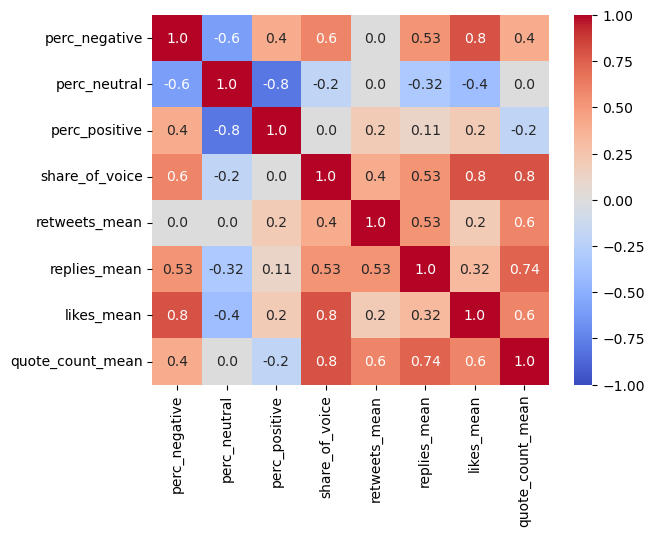

In [25]:
sns.heatmap(data=cross_correlations_twitter, cmap="coolwarm", annot=True, 
            fmt='.2', vmin=-1, vmax=1)

<AxesSubplot: >

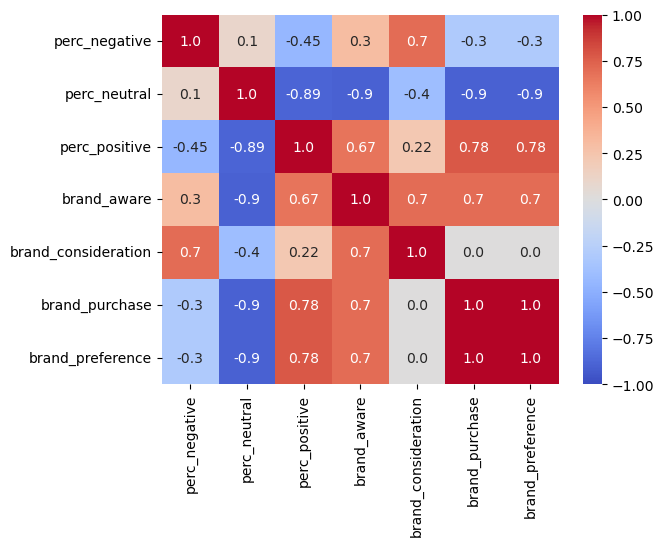

In [26]:
sns.heatmap(data=cross_correlations_survey_tot2, cmap="coolwarm", annot=True, 
            fmt='.2', vmin=-1, vmax=1)

<AxesSubplot: >

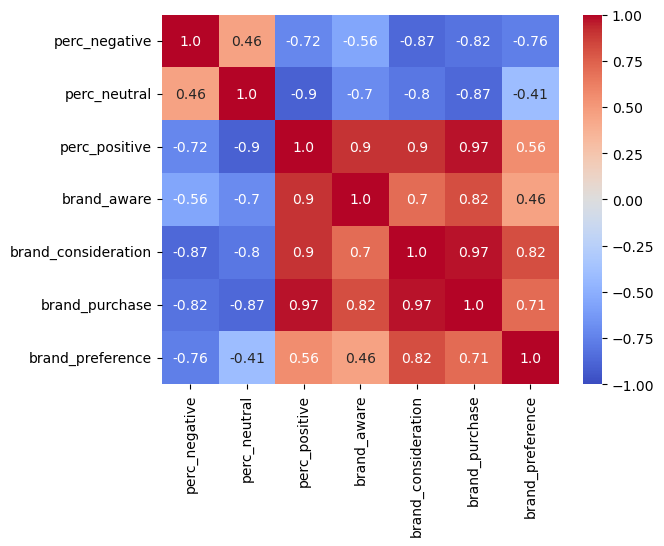

In [27]:
sns.heatmap(data=cross_correlations_survey_sub2, cmap="coolwarm", annot=True, 
            fmt='.2', vmin=-1, vmax=1)

Please, repeat the same steps for the other data sets.

# Across-data correlations (Kendall)

We also want to see correlations between KPIs of different data sets. So, let's combine two data sets with ranked data.

## Correlation between Twitter & Survey Subsample (Twitter Savvy)

In [33]:
across_correlations1 = pd.DataFrame(index=twitter_ranked.columns, columns=survey_sub_ranked.columns, dtype="float")


# across_correlations1 : twitter_ranked & subsample_ranked 


for var_twitter in twitter_ranked:
    for var_survey in survey_sub_ranked:
        correlation = twitter_ranked[var_twitter].corr(survey_sub_ranked[var_survey], method="kendall").round(2)
        across_correlations1.loc[var_twitter, var_survey] = correlation

In [34]:
across_correlations1

,perc_negative,perc_neutral,perc_positive,brand_aware,brand_consideration,brand_purchase,brand_preference
perc_negative,-0.32,0.00,0.20,0.00,0.40,0.32,0.74
perc_neutral,-0.11,0.00,0.20,0.40,0.00,0.11,-0.32
perc_positive,0.11,-0.20,0.00,-0.20,0.20,0.11,0.11
share_of_voice,-0.74,-0.40,0.60,0.40,0.80,0.74,0.95
retweets_mean,-0.74,-0.20,0.40,0.20,0.60,0.53,0.32
replies_mean,-0.67,0.11,0.11,-0.11,0.32,0.22,0.44
likes_mean,-0.53,-0.20,0.40,0.20,0.60,0.53,0.95
quote_count_mean,-0.95,-0.20,0.40,0.20,0.60,0.53,0.74


<AxesSubplot: >

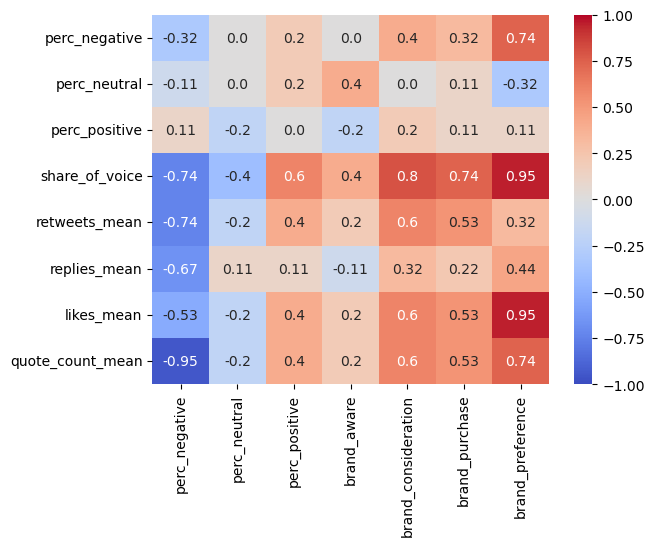

In [35]:
# across_correlations1 : twitter_ranked & subsample_ranked

sns.heatmap(across_correlations1,cmap="coolwarm", annot=True, 
            fmt='.2', vmin=-1, vmax=1)

 

## Correlation between Twitter & Survey Total

In [36]:
across_correlations2 = pd.DataFrame(index=twitter_ranked.columns, columns=survey_tot_ranked.columns, dtype="float")


# across_correlations2 : twitter_ranked & survey_total_ranked 

for var_twitter in twitter_ranked:
    for var_survey in survey_tot_ranked:
        correlation = twitter_ranked[var_twitter].corr(survey_tot_ranked[var_survey], method="kendall").round(2)
        across_correlations2.loc[var_twitter, var_survey] = correlation
        
across_correlations2

,perc_negative,perc_neutral,perc_positive,brand_aware,brand_consideration,brand_purchase,brand_preference
perc_negative,0.00,-0.20,-0.12,0.00,-0.40,0.40,0.40
perc_neutral,0.40,-0.20,0.12,0.40,0.80,0.00,0.00
perc_positive,-0.60,0.00,0.12,-0.20,-0.60,0.20,0.20
share_of_voice,0.00,-0.60,0.36,0.40,0.00,0.80,0.80
retweets_mean,-0.60,-0.40,0.60,0.20,-0.20,0.60,0.60
replies_mean,-0.53,-0.11,0.13,-0.11,-0.53,0.32,0.32
likes_mean,0.20,-0.40,0.12,0.20,-0.20,0.60,0.60
quote_count_mean,-0.20,-0.40,0.36,0.20,-0.20,0.60,0.60


<AxesSubplot: >

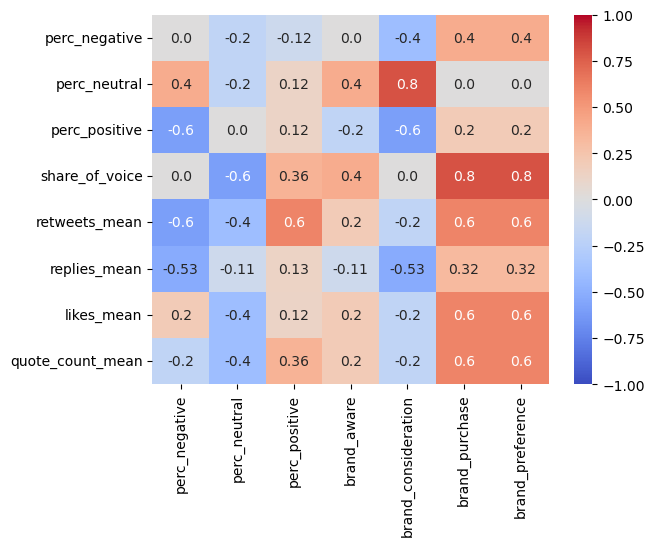

In [37]:
sns.heatmap(across_correlations2, cmap="coolwarm", annot=True, 
            fmt='.2', vmin=-1, vmax=1)

## Correlation between Survey Total & Survey Subsample (Twitter Savvy)

In [38]:
across_correlations3 = pd.DataFrame(index=survey_sub_ranked.columns, columns=survey_tot_ranked.columns, dtype="float")


# across_correlations3 : survey_subsample_ranked & survey_total_ranked 


for var_sub in survey_sub_ranked:
    for var_tot in survey_tot_ranked:
        correlation = survey_sub_ranked[var_sub].corr(survey_tot_ranked[var_tot], method="kendall").round(2)
        across_correlations3.loc[var_sub, var_tot] = correlation
        
across_correlations3

,perc_negative,perc_neutral,perc_positive,brand_aware,brand_consideration,brand_purchase,brand_preference
perc_negative,0.32,0.53,-0.50,-0.32,0.11,-0.74,-0.74
perc_neutral,0.20,0.80,-0.84,-0.60,-0.20,-0.60,-0.60
perc_positive,0.00,-1.00,0.84,0.80,0.40,0.80,0.80
brand_aware,0.20,-0.80,0.60,1.00,0.60,0.60,0.60
brand_consideration,-0.20,-0.80,0.60,0.60,0.20,1.00,1.00
brand_purchase,-0.11,-0.95,0.76,0.74,0.32,0.95,0.95
brand_preference,0.11,-0.53,0.25,0.32,-0.11,0.74,0.74


<AxesSubplot: >

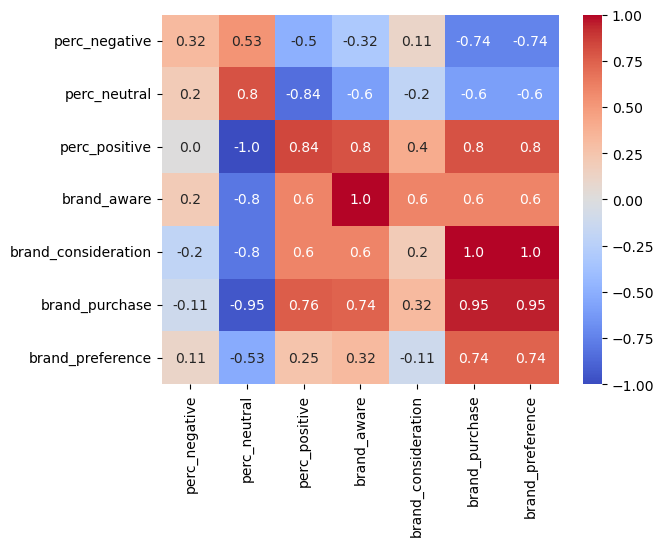

In [39]:
sns.heatmap(across_correlations3, cmap="coolwarm", annot=True, 
            fmt='.2', vmin=-1, vmax=1)

# Across-data correlations (Pearson)

We also want to see correlations between KPIs of different data sets. So, let's combine two data sets with ranked data.

## Correlation between Twitter & Survey Subsample (Twitter Savvy)

In [40]:
across_correlations1b = pd.DataFrame(index=twitter_ranked.columns, columns=survey_sub_ranked.columns, dtype="float")


# across_correlations1 : twitter_ranked & subsample_ranked 


for var_twitter in twitter_ranked:
    for var_survey in survey_sub_ranked:
        correlation = twitter_ranked[var_twitter].corr(survey_sub_ranked[var_survey], method="pearson").round(2)
        across_correlations1b.loc[var_twitter, var_survey] = correlation

In [41]:
across_correlations1b

,perc_negative,perc_neutral,perc_positive,brand_aware,brand_consideration,brand_purchase,brand_preference
perc_negative,-0.46,0.10,0.0,-0.10,0.40,0.21,0.82
perc_neutral,0.05,-0.10,0.3,0.60,-0.10,0.10,-0.36
perc_positive,-0.05,-0.20,-0.1,-0.50,0.20,0.05,0.21
share_of_voice,-0.87,-0.50,0.7,0.60,0.90,0.82,0.97
retweets_mean,-0.82,-0.50,0.6,0.30,0.70,0.67,0.36
replies_mean,-0.76,0.15,0.1,-0.05,0.41,0.26,0.53
likes_mean,-0.62,-0.30,0.4,0.30,0.70,0.56,0.97
quote_count_mean,-0.97,-0.30,0.6,0.50,0.80,0.72,0.82


<AxesSubplot: >

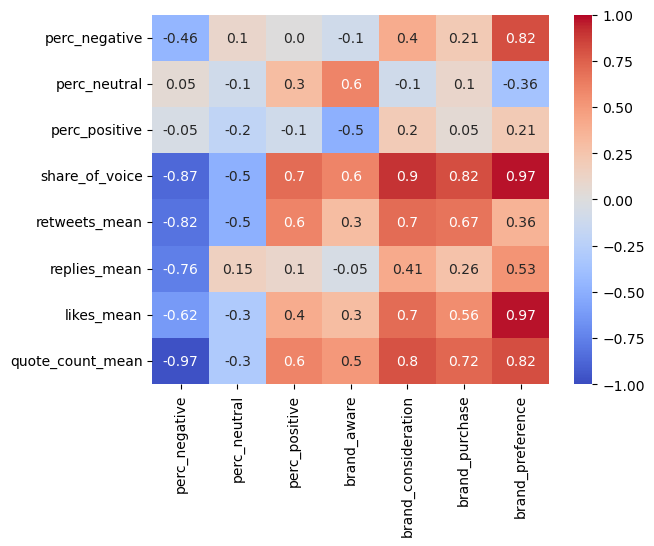

In [42]:
# across_correlations1 : twitter_ranked & subsample_ranked

sns.heatmap(across_correlations1b,cmap="coolwarm", annot=True, 
            fmt='.2', vmin=-1, vmax=1)

 

## Correlation between Twitter & Survey Total

In [43]:
across_correlations2b = pd.DataFrame(index=twitter_ranked.columns, columns=survey_tot_ranked.columns, dtype="float")


# across_correlations2 : twitter_ranked & survey_total_ranked 

for var_twitter in twitter_ranked:
    for var_survey in survey_tot_ranked:
        correlation = twitter_ranked[var_twitter].corr(survey_tot_ranked[var_survey], method="pearson").round(2)
        across_correlations2b.loc[var_twitter, var_survey] = correlation
        
across_correlations2b

,perc_negative,perc_neutral,perc_positive,brand_aware,brand_consideration,brand_purchase,brand_preference
perc_negative,-0.10,0.0,-0.22,-0.10,-0.60,0.40,0.40
perc_neutral,0.50,-0.3,0.22,0.60,0.90,-0.10,-0.10
perc_positive,-0.70,0.1,0.11,-0.50,-0.80,0.20,0.20
share_of_voice,-0.10,-0.7,0.45,0.60,-0.10,0.90,0.90
retweets_mean,-0.80,-0.6,0.78,0.30,-0.30,0.70,0.70
replies_mean,-0.56,-0.1,0.11,-0.05,-0.62,0.41,0.41
likes_mean,0.00,-0.4,0.11,0.30,-0.30,0.70,0.70
quote_count_mean,-0.30,-0.6,0.45,0.50,-0.20,0.80,0.80


<AxesSubplot: >

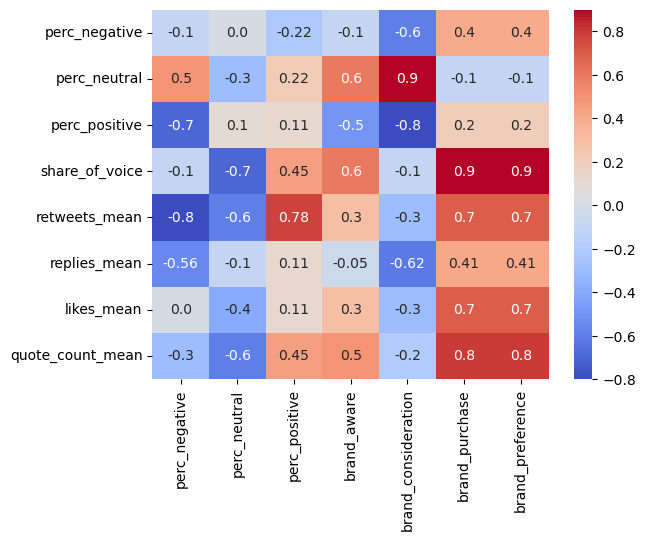

In [44]:
sns.heatmap(across_correlations2b, cmap="coolwarm", annot=True, 
            fmt='.2')

## Correlation between Survey Total & Survey Subsample (Twitter Savvy)

In [45]:
across_correlations3b = pd.DataFrame(index=survey_sub_ranked.columns, columns=survey_tot_ranked.columns, dtype="float")


# across_correlations3 : survey_subsample_ranked & survey_total_ranked 


for var_sub in survey_sub_ranked:
    for var_tot in survey_tot_ranked:
        correlation = survey_sub_ranked[var_sub].corr(survey_tot_ranked[var_tot], method="pearson").round(2)
        across_correlations3b.loc[var_sub, var_tot] = correlation
        
across_correlations3b

,perc_negative,perc_neutral,perc_positive,brand_aware,brand_consideration,brand_purchase,brand_preference
perc_negative,0.41,0.72,-0.63,-0.56,0.15,-0.87,-0.87
perc_neutral,0.20,0.90,-0.89,-0.70,-0.30,-0.80,-0.80
perc_positive,-0.10,-1.00,0.89,0.90,0.40,0.90,0.90
brand_aware,0.30,-0.90,0.67,1.00,0.70,0.70,0.70
brand_consideration,-0.30,-0.90,0.78,0.70,0.00,1.00,1.00
brand_purchase,-0.21,-0.97,0.86,0.82,0.21,0.97,0.97
brand_preference,-0.05,-0.56,0.29,0.46,-0.21,0.82,0.82


<AxesSubplot: >

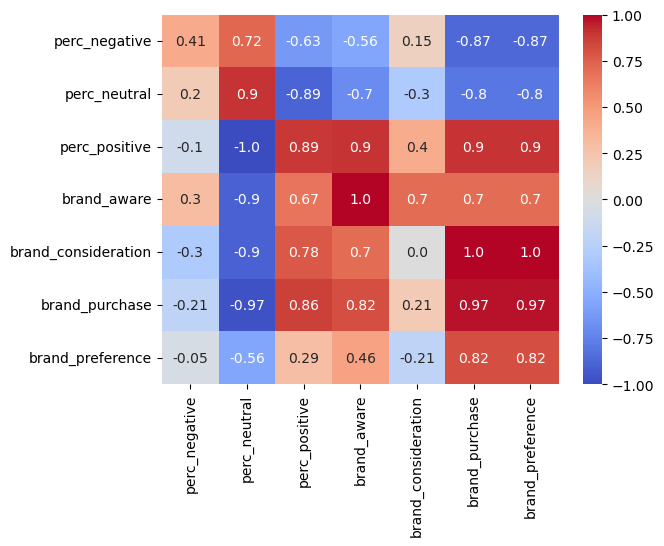

In [46]:
sns.heatmap(across_correlations3b, cmap="coolwarm", annot=True, 
            fmt='.2')